In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

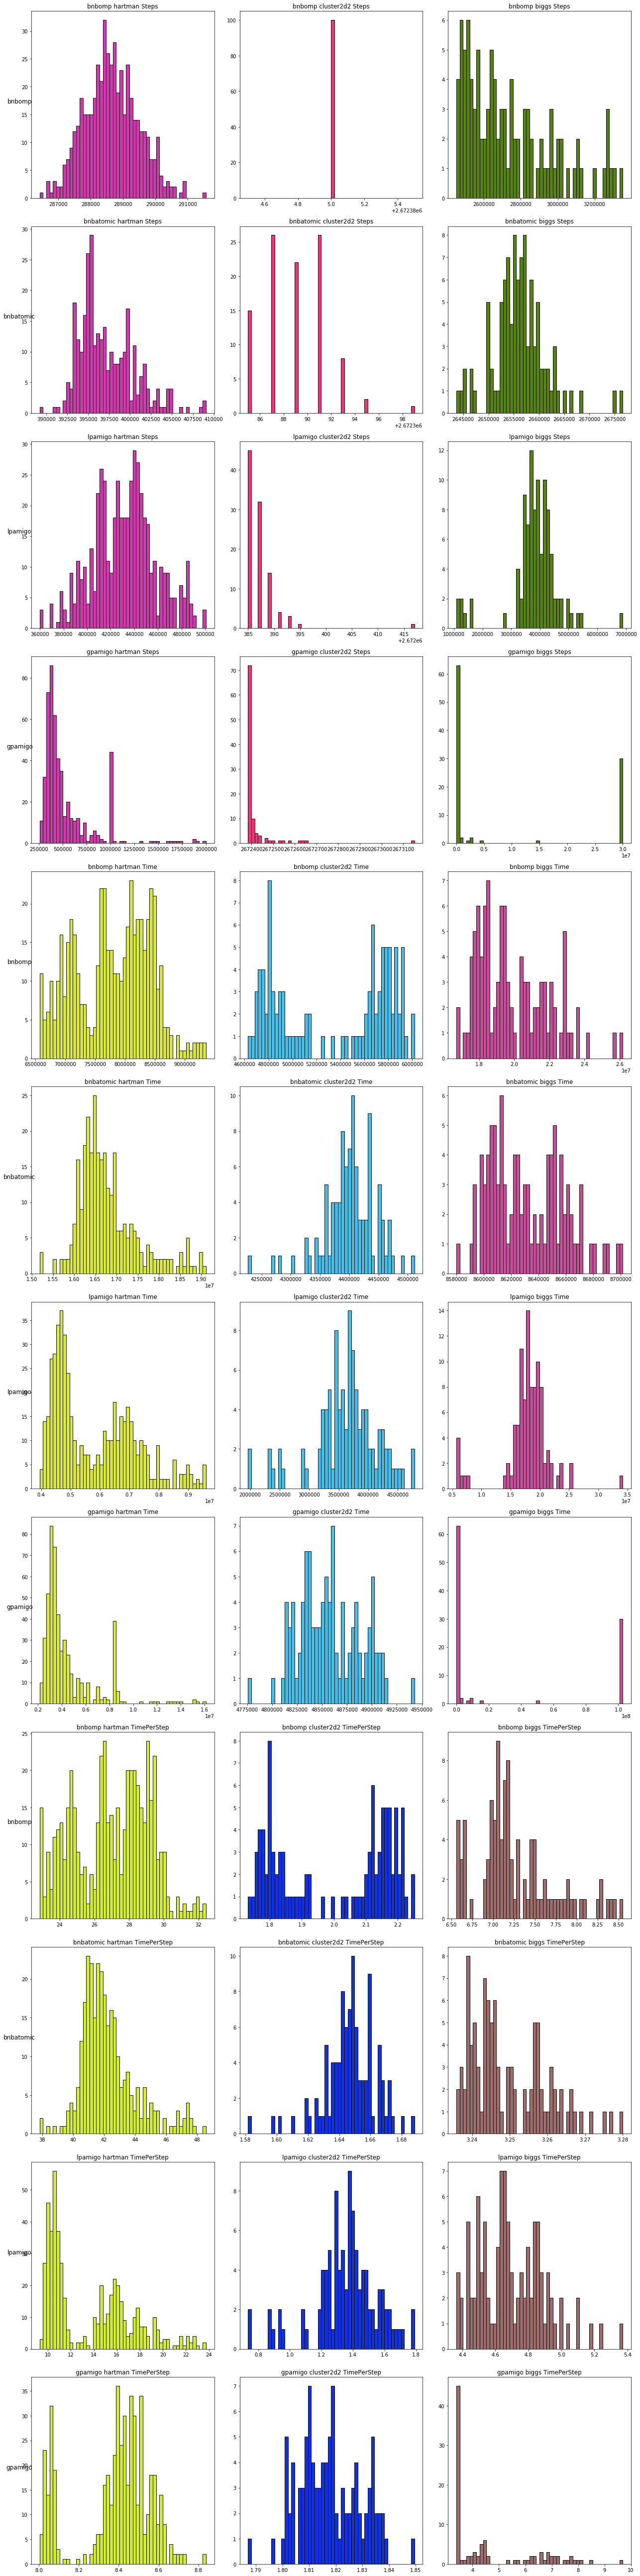

In [2]:
TEST_NAMES = [
    'hartman6',
    'cluster2d2',
    'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic',
    'lpamigo',
    'gpamigo',
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
TEST_COUNT = len(TEST_NAMES)
ALGO_COUNT = len(ALGORITHM_NAMES)
PARAM_COUNT = len(HIST_PARAMS)
COLORS = [np.random.rand(3,) for i in range(TEST_COUNT * ALGO_COUNT * PARAM_COUNT)]

DATASETS = {}
for algo_name in ALGORITHM_NAMES:
    DATASETS[algo_name] = {}
    for test_name in TEST_NAMES:
        file_path = '{}/data_{}.txt'.format(algo_name, test_name)
        dataset = pd.read_csv(file_path, sep=',')
        DATASETS[algo_name][test_name] = dataset

fig, axes = plt.subplots(nrows=ALGO_COUNT * PARAM_COUNT, ncols=TEST_COUNT)
fig.set_size_inches(18, 6 * (ALGO_COUNT * PARAM_COUNT))

for i, ax in enumerate(axes.flat):
    idx_param = int((i / (ALGO_COUNT * TEST_COUNT)))
    param_name = HIST_PARAMS[idx_param]
    idx_algo = int((i % (ALGO_COUNT * TEST_COUNT)) / TEST_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    idx_test = (i % (ALGO_COUNT * TEST_COUNT)) % TEST_COUNT
    test_name = TEST_NAMES[idx_test]

    dataset = DATASETS[algo_name][test_name]
    
    ax.hist(dataset[param_name], color = COLORS[idx_param * PARAM_COUNT + idx_test], edgecolor = 'black', bins = int(50))
    ax.set_title('{} {} {}'.format(algo_name, test_name, param_name))
    
for i, ax in enumerate(axes[:,0]):
    idx_algo = int(i % ALGO_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    ax.set_ylabel(algo_name, size='large', rotation=0)

fig.tight_layout()
plt.show()

{'hartman6': {'Steps': [200000, 2000000], 'Time': [2000000, 20000000], 'TimePerStep': [8, 48]}, 'cluster2d2': {'Steps': [2672380, 2673160], 'Time': [1900000, 6100000], 'TimePerStep': [0, 2]}}


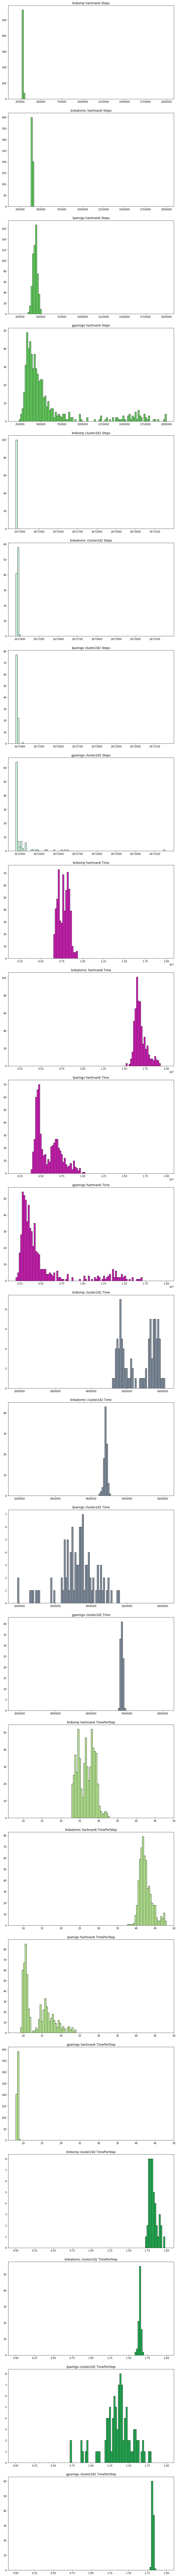

In [11]:
TEST_NAMES = [
    'hartman6',
    'cluster2d2',
    #'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic',
    'lpamigo',
    'gpamigo',
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
TEST_COUNT = len(TEST_NAMES)
ALGO_COUNT = len(ALGORITHM_NAMES)
PARAM_COUNT = len(HIST_PARAMS)
COLORS = [np.random.rand(3,) for i in range(TEST_COUNT * ALGO_COUNT * PARAM_COUNT)]

DATASETS = {}
RANGES = {}

for algo_name in ALGORITHM_NAMES:
    DATASETS[algo_name] = {}
    for test_name in TEST_NAMES:
        file_path = '{}/data_{}.txt'.format(algo_name, test_name)
        dataset = pd.read_csv(file_path, sep=',')
        if test_name not in RANGES.keys():
            RANGES[test_name] = {}
        for param in HIST_PARAMS:
            if param not in RANGES[test_name].keys():
                RANGES[test_name][param] = [1e10, 0]
            if algo_name == 'gpamigo' and test_name == 'biggs':
                continue
                
            RANGES[test_name][param][0] = int(min(RANGES[test_name][param][0], dataset[param].min()))
            RANGES[test_name][param][1] = int(max(RANGES[test_name][param][1], dataset[param].max()))
            if algo_name == ALGORITHM_NAMES[-1]:
                diff = RANGES[test_name][param][1] - RANGES[test_name][param][0]
                digits = len(str(diff)) - 2
                if digits < 0:
                    continue
                power = pow(10, digits)
                RANGES[test_name][param][1] = math.ceil(RANGES[test_name][param][1] / power) * power
                RANGES[test_name][param][0] = math.floor(RANGES[test_name][param][0] / power) * power
      
        DATASETS[algo_name][test_name] = dataset
        

print(RANGES)


fig, axes = plt.subplots(nrows=ALGO_COUNT * PARAM_COUNT * TEST_COUNT, ncols=1)
fig.set_size_inches(10, 6 * (ALGO_COUNT * PARAM_COUNT * TEST_COUNT))

for i, ax in enumerate(axes.flat):
    idx_param = int((i / (ALGO_COUNT * TEST_COUNT)))
    param_name = HIST_PARAMS[idx_param]
    idx_algo = int((i % (ALGO_COUNT * TEST_COUNT)) % ALGO_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    idx_test = int((i % (ALGO_COUNT * TEST_COUNT)) / ALGO_COUNT)
    test_name = TEST_NAMES[idx_test]

    dataset = DATASETS[algo_name][test_name]
    ax.set_title('{} {} {}'.format(algo_name, test_name, param_name))
    if algo_name == 'gpamigo' and test_name == 'biggs':
        continue
    ax.hist(dataset[param_name], color = COLORS[idx_param * PARAM_COUNT + idx_test], edgecolor = 'black', 
            bins = int(100), range=tuple(RANGES[test_name][param_name]))

    
#for i, ax in enumerate(axes[:,0]):
#    idx_algo = int(i % ALGO_COUNT)
#    algo_name = ALGORITHM_NAMES[idx_algo]
#    ax.set_ylabel(algo_name, size='large', rotation=0)

fig.tight_layout()
plt.show()

RANGES:  {'hartman6': {'Steps': [200000, 2000000], 'Time': [2000000, 20000000], 'TimePerStep': [8, 48]}, 'cluster2d2': {'Steps': [2672380, 2673160], 'Time': [1900000, 6100000], 'TimePerStep': [0, 2]}}


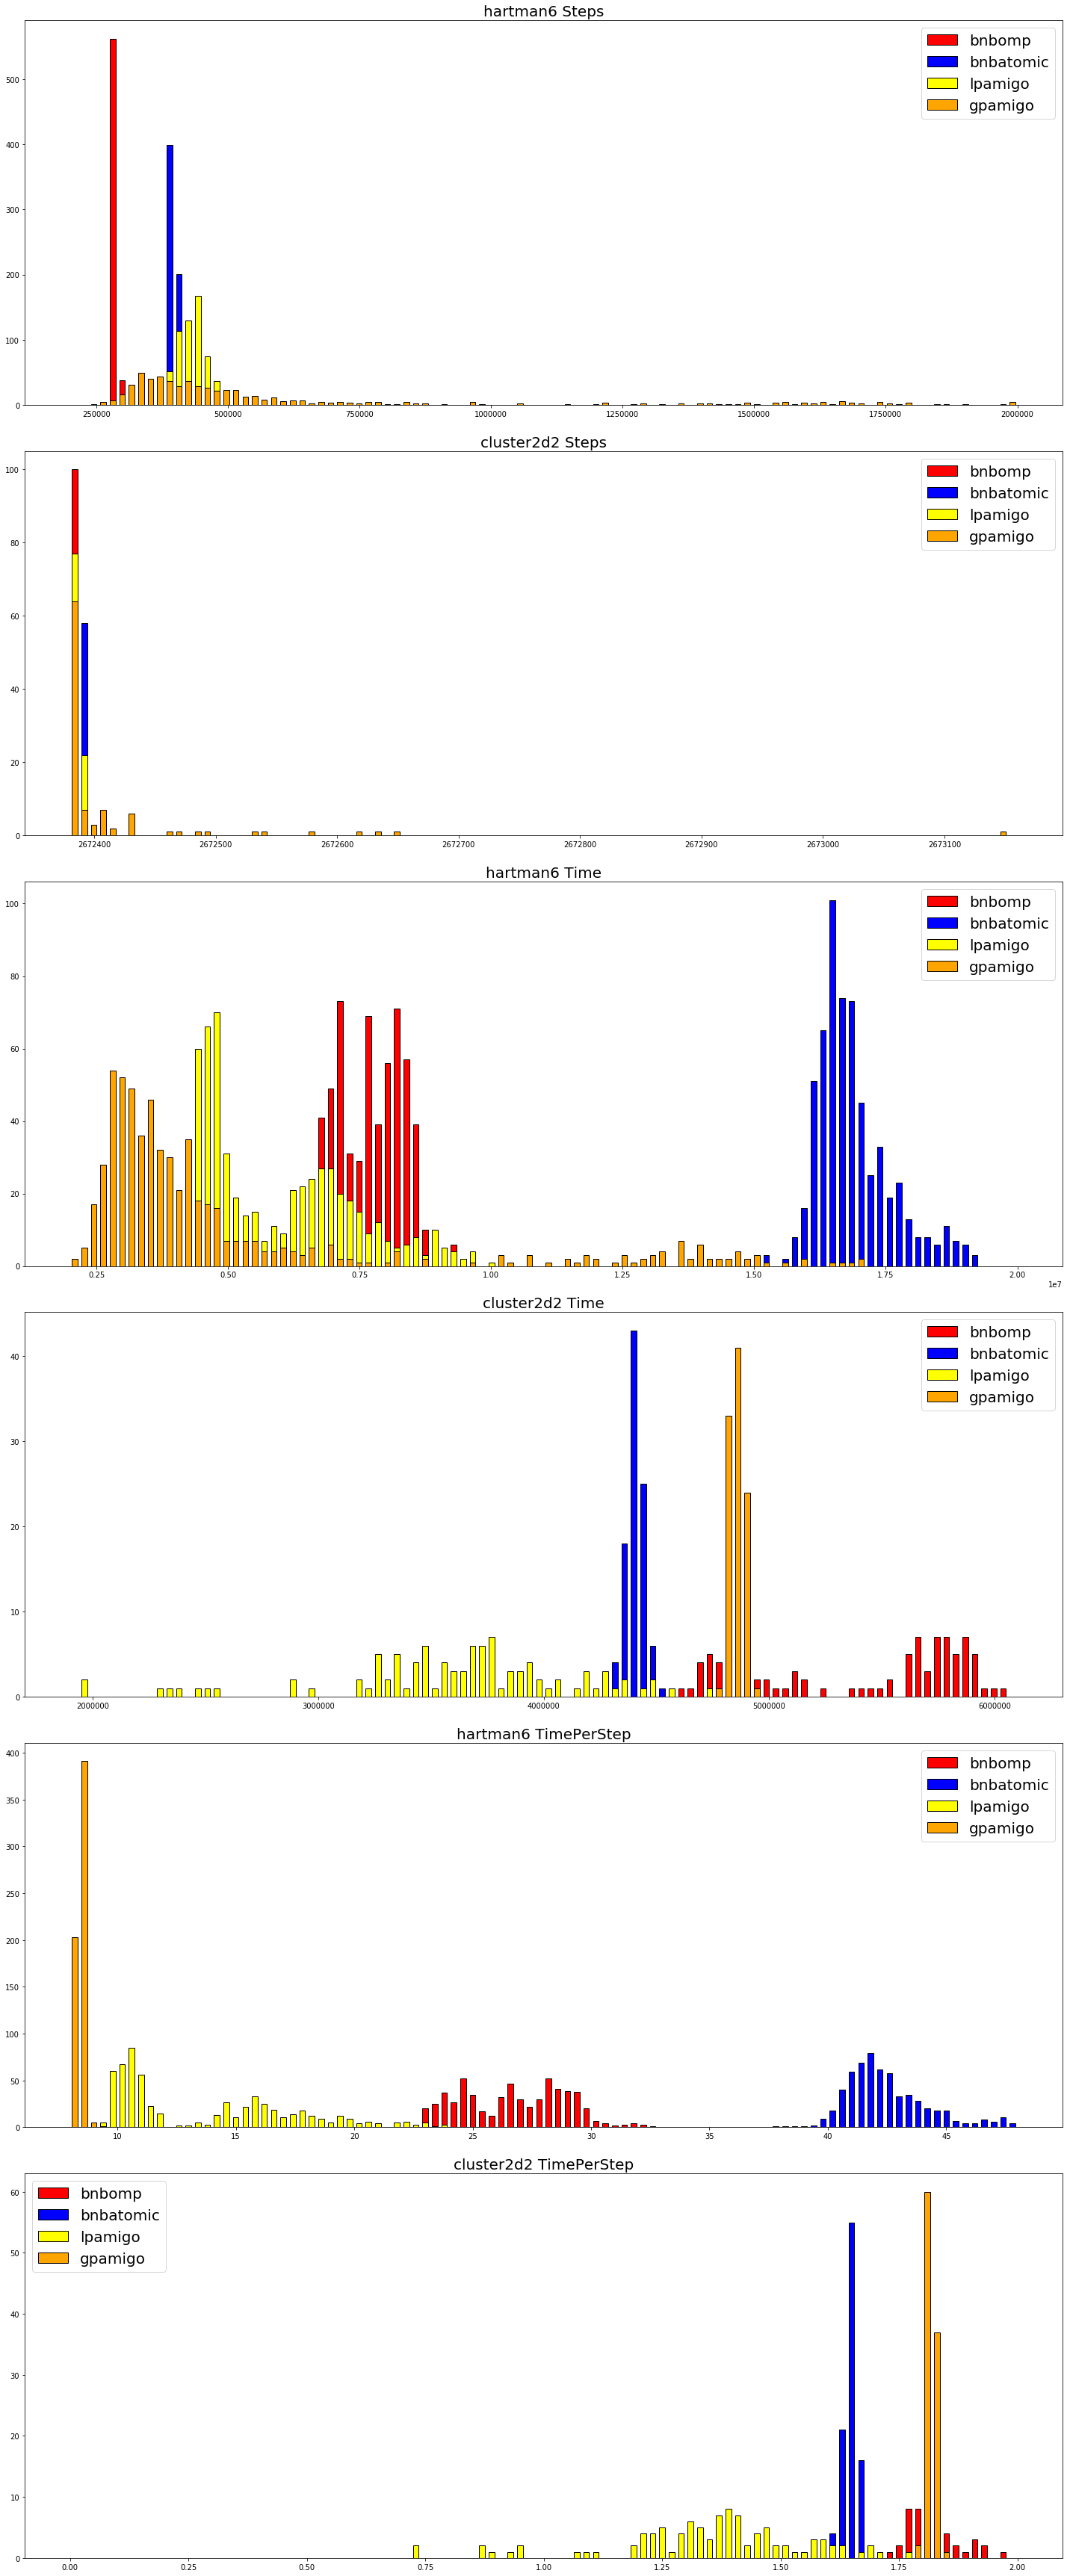

In [15]:
TEST_NAMES = [
    'hartman6',
    'cluster2d2',
    #'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic',
    'lpamigo',
    'gpamigo',
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
TEST_COUNT = len(TEST_NAMES)
ALGO_COUNT = len(ALGORITHM_NAMES)
PARAM_COUNT = len(HIST_PARAMS)
COLORS = ['red', 'blue', 'yellow', 'orange']

DATASETS = {}
RANGES = {}

for algo_name in ALGORITHM_NAMES:
    DATASETS[algo_name] = {}
    for test_name in TEST_NAMES:
        file_path = '{}/data_{}.txt'.format(algo_name, test_name)
        dataset = pd.read_csv(file_path, sep=',')
        if test_name not in RANGES.keys():
            RANGES[test_name] = {}
        for param in HIST_PARAMS:
            if param not in RANGES[test_name].keys():
                RANGES[test_name][param] = [1e10, 0]
            if algo_name == 'gpamigo' and test_name == 'biggs':
                continue
                
            RANGES[test_name][param][0] = int(min(RANGES[test_name][param][0], dataset[param].min()))
            RANGES[test_name][param][1] = int(max(RANGES[test_name][param][1], dataset[param].max()))
            if algo_name == ALGORITHM_NAMES[-1]:
                diff = RANGES[test_name][param][1] - RANGES[test_name][param][0]
                digits = len(str(diff)) - 2
                if digits < 0:
                    continue
                power = pow(10, digits)
                RANGES[test_name][param][1] = math.ceil(RANGES[test_name][param][1] / power) * power
                RANGES[test_name][param][0] = math.floor(RANGES[test_name][param][0] / power) * power
      
        DATASETS[algo_name][test_name] = dataset
print('RANGES: ', RANGES)


fig, axes = plt.subplots(nrows=PARAM_COUNT * TEST_COUNT, ncols=1)
fig.set_size_inches(20, 8 * (PARAM_COUNT * TEST_COUNT))

for i, ax in enumerate(axes.flat):
    data_to_plot = []
    plot_colors = []
    labels = []
    for j in range(i * ALGO_COUNT, (i + 1) * ALGO_COUNT):
        idx_param = int((j / (ALGO_COUNT * TEST_COUNT)))
        param_name = HIST_PARAMS[idx_param]
        idx_algo = int((j % (ALGO_COUNT * TEST_COUNT)) % ALGO_COUNT)
        algo_name = ALGORITHM_NAMES[idx_algo]
        idx_test = int((j % (ALGO_COUNT * TEST_COUNT)) / ALGO_COUNT)
        test_name = TEST_NAMES[idx_test]

        dataset = DATASETS[algo_name][test_name]

        if algo_name == 'gpamigo' and test_name == 'biggs':
            data_to_plot.append([])
        else:
            data_to_plot.append(dataset[param_name])
        labels.append(algo_name)
        ax.hist(dataset[param_name], color=COLORS[idx_algo], edgecolor = 'black', histtype='barstacked',
            bins = int(100), range=tuple(RANGES[test_name][param_name]), label=algo_name, rwidth=0.6)
        
    
    ax.set_title('{} {}'.format(test_name, param_name), fontsize=20)

    #ax.hist(data_to_plot, color=plot_colors, edgecolor = 'black', stacked=False, density=True, #histtype='barstacked',
    #    bins = int(50), range=tuple(RANGES[test_name][param_name]), label=labels, rwidth=0.9)
    ax.legend(prop={'size': 20})


#for i, ax in enumerate(axes[:,0]):
#    idx_algo = int(i % ALGO_COUNT)
#    algo_name = ALGORITHM_NAMES[idx_algo]
#    ax.set_ylabel(algo_name, size='large', rotation=0)

fig.tight_layout()
plt.show()

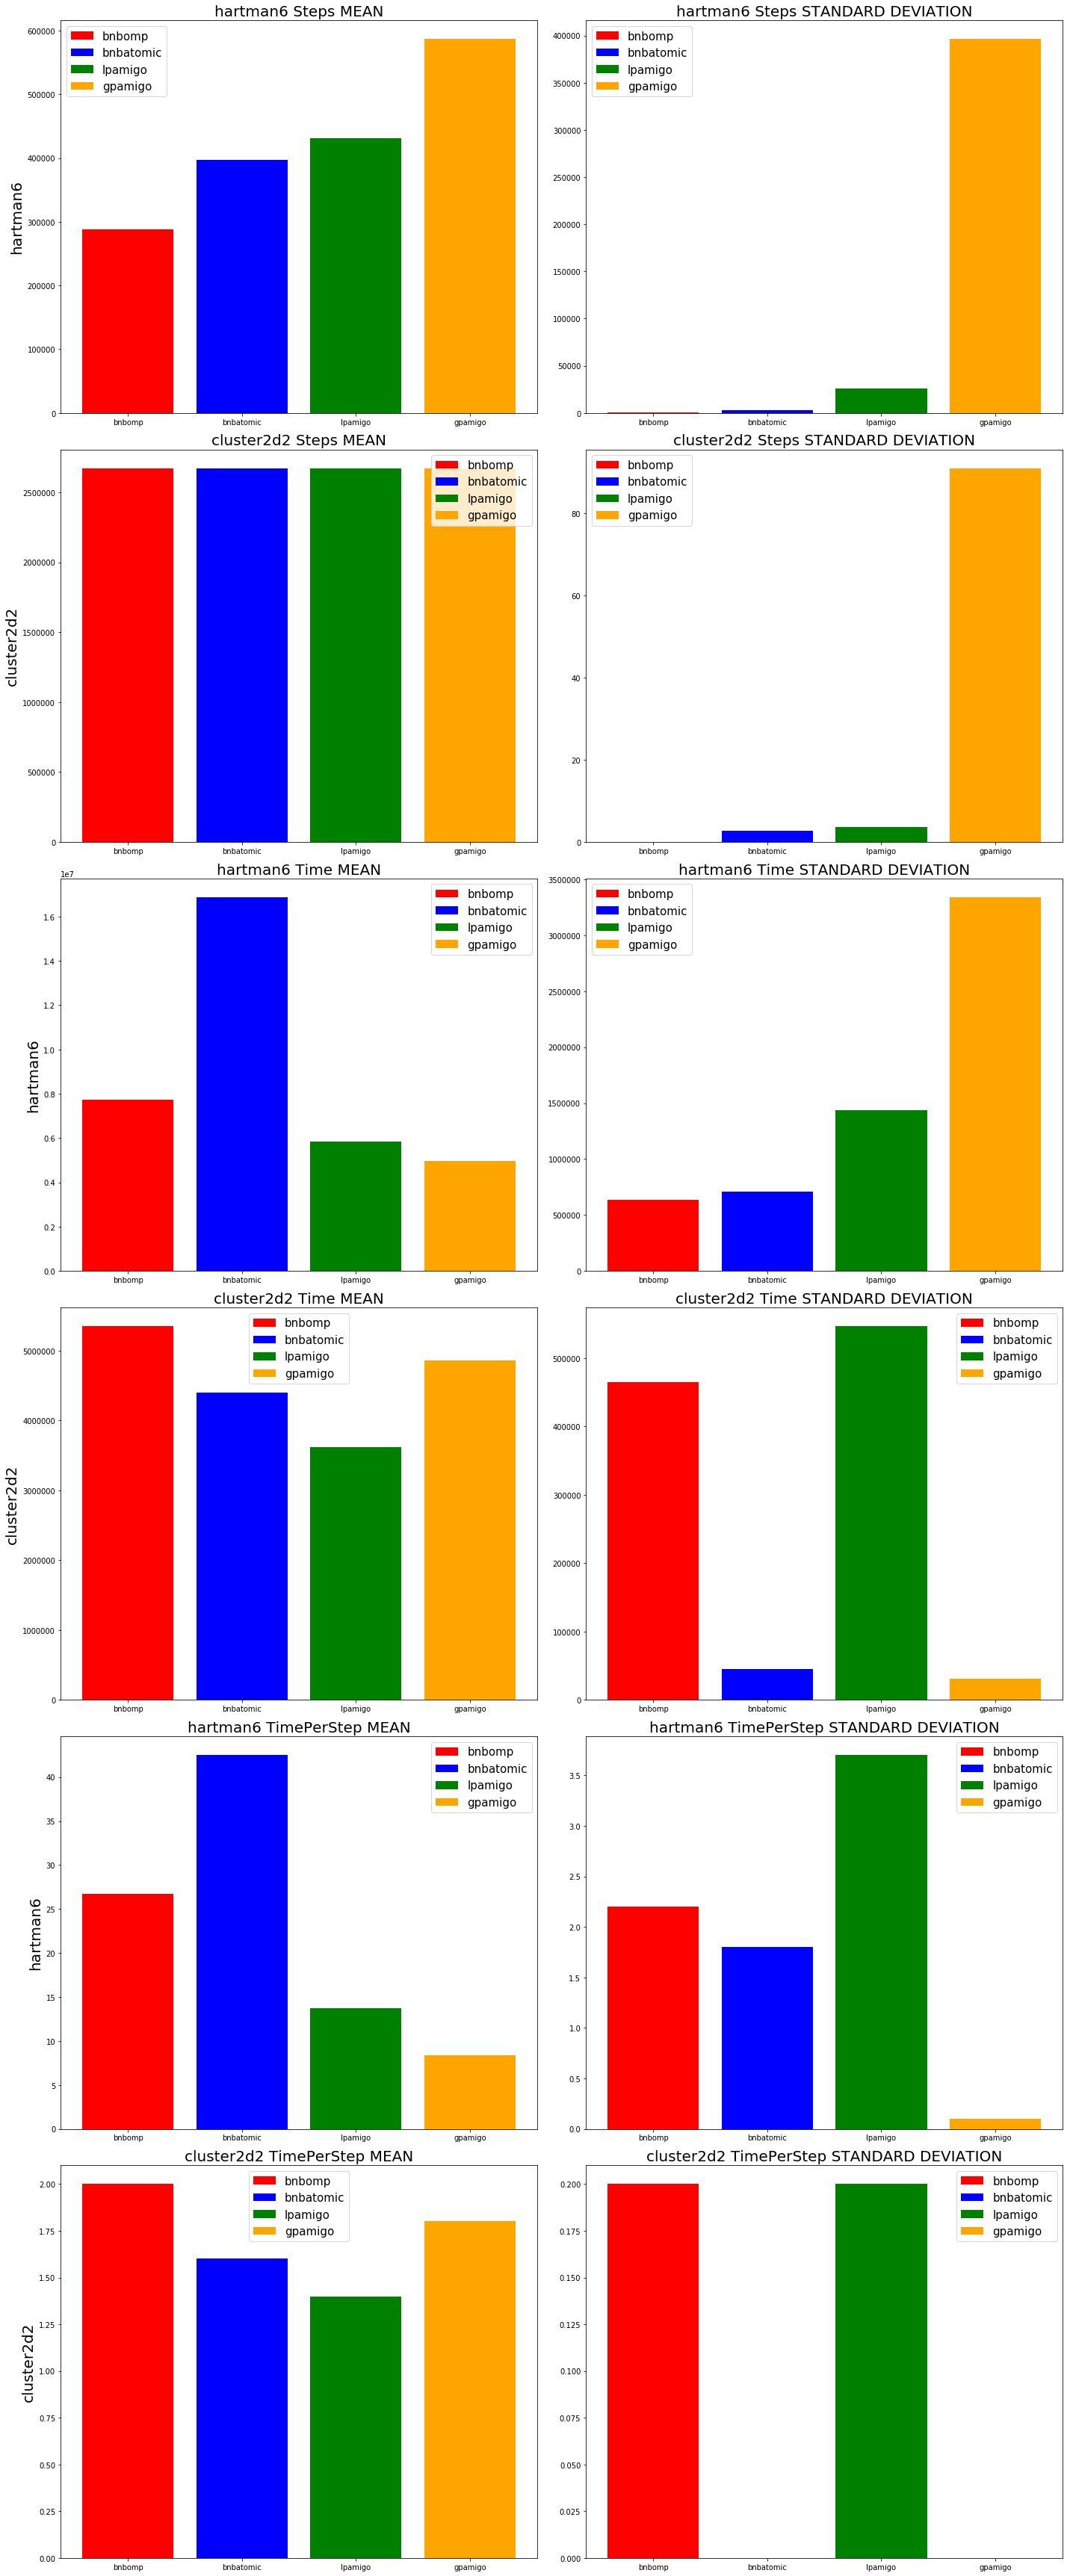

In [14]:
import statistics


TEST_NAMES = [
    'hartman6',
    'cluster2d2',
    #'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic',
    'lpamigo',
    'gpamigo',
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
TEST_COUNT = len(TEST_NAMES)
ALGO_COUNT = len(ALGORITHM_NAMES)
PARAM_COUNT = len(HIST_PARAMS)
COLORS = ['red', 'blue', 'green', 'orange']
DATASETS = {}
RANGES = {}

for algo_name in ALGORITHM_NAMES:
    DATASETS[algo_name] = {}
    for test_name in TEST_NAMES:
        file_path = '{}/data_{}.txt'.format(algo_name, test_name)
        dataset = pd.read_csv(file_path, sep=',')
        DATASETS[algo_name][test_name] = dataset

results = {}

fig, axes = plt.subplots(nrows=PARAM_COUNT * TEST_COUNT, ncols=2)
fig.set_size_inches(20, 8 * (PARAM_COUNT * TEST_COUNT))
idx_ax = 0

for param in HIST_PARAMS:
    for test_name in TEST_NAMES:
        res_stdev = []
        res_mean = []
        for algo_name in ALGORITHM_NAMES:
            if algo_name not in results.keys():
                results[algo_name] = []
            mean = round(statistics.mean(DATASETS[algo_name][test_name][param]), 1)
            stdev = round(statistics.stdev(DATASETS[algo_name][test_name][param]), 1)
            results[algo_name].append([mean, stdev])
            res_stdev.append(stdev)
            res_mean.append(mean)
        mean_ax = axes.flat[idx_ax]
        bar = mean_ax.bar(ALGORITHM_NAMES, res_mean, color=COLORS)
        mean_ax.set_title('{} {} {}'.format(test_name, param, 'MEAN'), fontsize=20)
        mean_ax.legend(bar, ALGORITHM_NAMES, fontsize=15)
        mean_ax.set_ylabel(test_name, fontsize=20)
        stdev_ax = axes.flat[idx_ax + 1]
        bar = stdev_ax.bar(ALGORITHM_NAMES, res_stdev, color=COLORS)
        stdev_ax.set_title('{} {} {}'.format(test_name, param, 'STANDARD DEVIATION'), fontsize=20)
        stdev_ax.legend(bar, ALGORITHM_NAMES, fontsize=15)
        idx_ax += 2
        
     

fig.tight_layout()
plt.show()  